In [1]:
from scipy.io import netcdf
import plots
import similarity_measures as sim
import calculations as calc

In [2]:
nc_l30 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l30-u.nc")

<h2>Derive QBO</h2>

In [3]:
lon = calc.convert_coordinates_to_grid(nc_l30.variables["longitude"][:], 180)
lat = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0)

lon_step = 256 #Around the whole equator
lat_step = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0) - calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 5)


u_l30 = nc_l30.variables["u"]

#Deseasonalize
u_l30 = calc.deseasonalize_map(u_l30)

qbo_equator = calc.derive(u_l30[:, :, :, :], lat, lon, 0, lat_step, lon_step)

<h1>Calculate and plot dependency between two similarity measures</h1>

In [4]:
print(plots.plot_similarity_dependency.__doc__)


    Plot a matrix of dependcies between two similarity measures with one similarity
    measure on the x-axis and one on the y-axis

    Args:
        map_array (numpy.ndarray): Map with 4 dimensions - time, level, latitude, longitude
        reference_series (numpy.ndarray): 1 dimensional reference series
        measures (list): List of similarity measures to compute similarity between two time series
        labels (list): List of labels for the measures
        level (int, optional): Level on which the similarity should be calculated
            Defaults to 0
    


<h4>Pearson's Correlation vs Mutual Information vs Transfer Entropy vs Manhattan Distance</h4>

In [5]:
measures = [sim.pearson_correlation, sim.mutual_information, sim.transfer_entropy, sim.manhattan_distance]

In [6]:
measure_labels = ["Pearson's Correlation", "Mutual Information", "Transfer Entropy", "Manhattan Distance"]

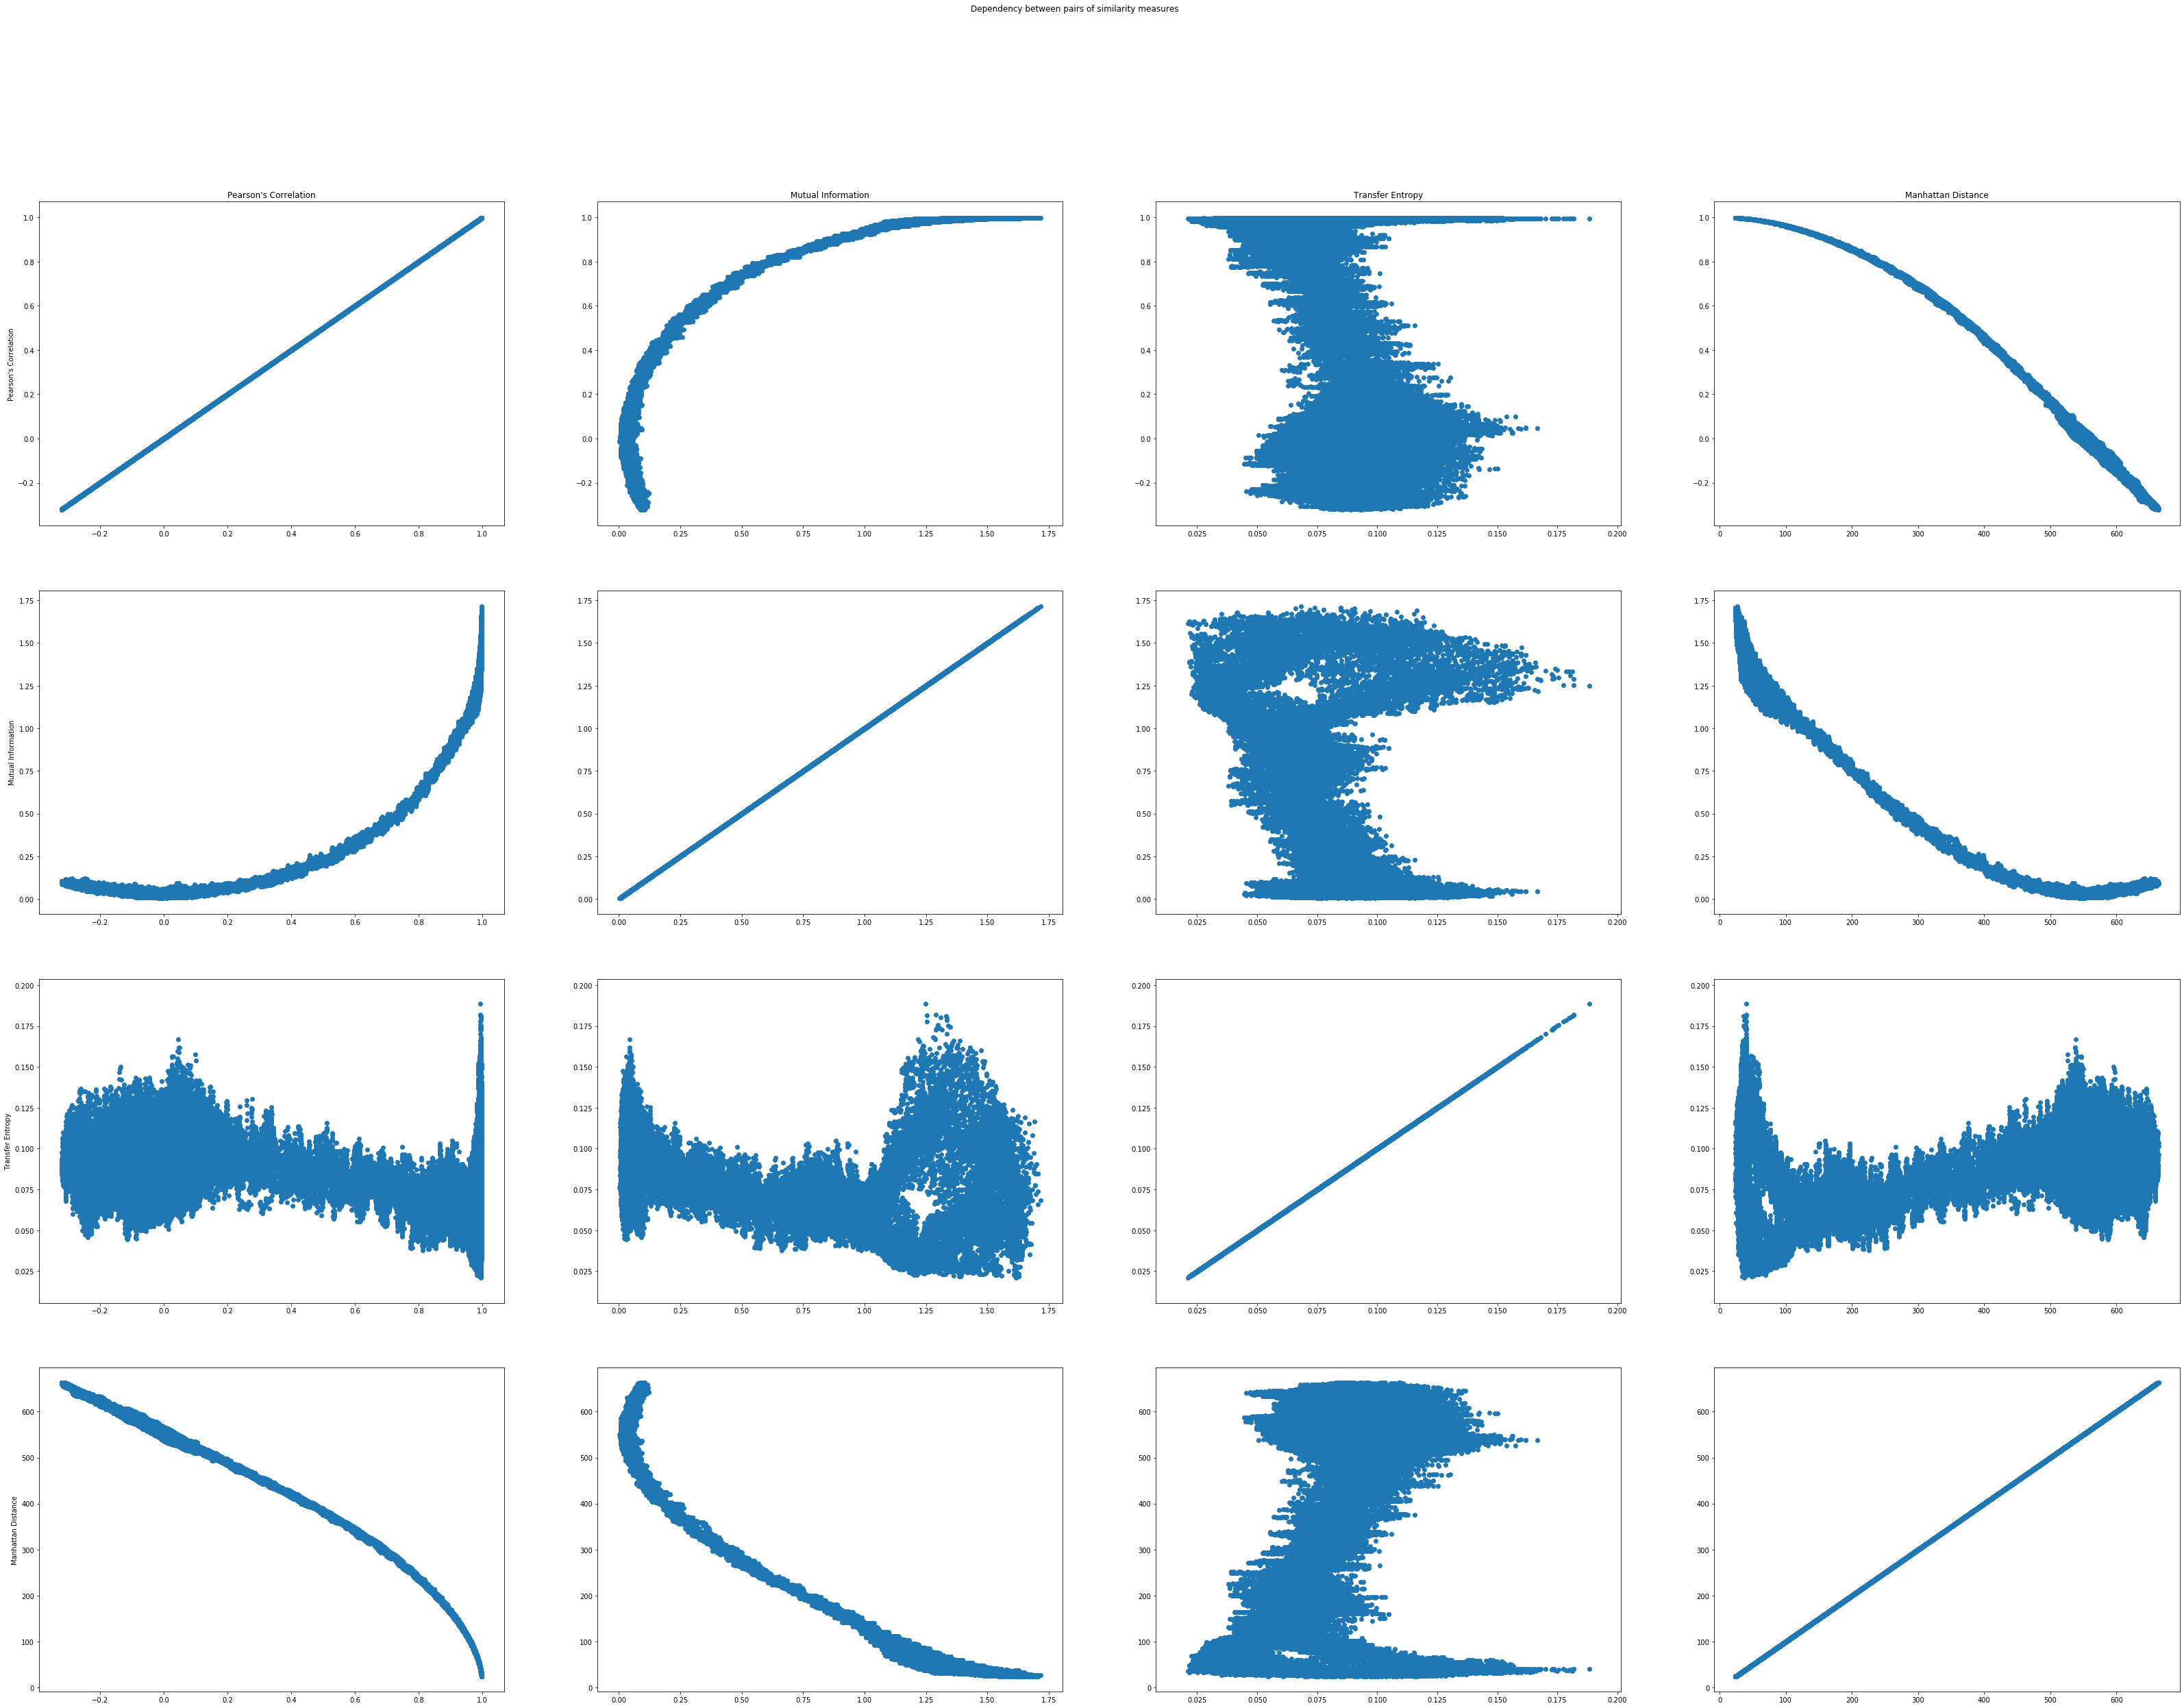

In [7]:
plots.plot_similarity_dependency(u_l30, qbo_equator, measures, measure_labels)